# Part 2. Overview of Seaborn, Matplotlib, and Plotly libraries

### 1. Dataset

First, lets set up our environment by importing the necessary libraries. We will also change the display settings to better show plots.

In [1]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the defatult plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

# Finally, Pandas
import pandas as pd

Now to load our dataset. We will be using data based on video games sales and rankings. 

Some of the games in this dataset lack ratings, so lets filter for only those examples that have all their values present:

In [2]:
df = pd.read_csv('../data/video_games.csv').dropna()
print(df.shape)

(6825, 16)


In [4]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


Lets also print out the summary for our DataFrame to check data types and verify everything in non-null:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


Some of our features that are actually numerical were counted in as an object type. We will explicitly convert those columns into ```float``` and ```int``` types

In [5]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

The resulting DataFrame contains 6825 examples and 16 columns. To make it more convinient, we have listed only the variables we will use in this notebook.

In [7]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre',
                'Global_Sales', 'Critic_Score', 'Critic_Count',
                'User_Score', 'User_Count', 'Rating']

df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


### 2. DataFrame.plot()

THe simplest and often most convinient way to visualize data frmo a DataFrame is using its own ```plot()``` method.

Here is a plot of video game sales by country and year:

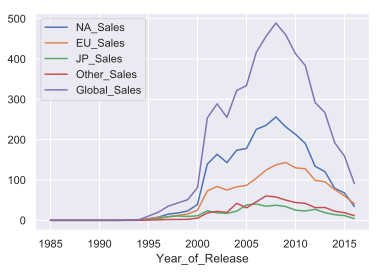

In [11]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

Note that the implementation of the ```plot()``` method in ```pandas``` is based on ```matplotlib```

### 3. Seaborn

```seaborn``` is a higher-level API based on the ```matplotlib``` library. It differs from the latter in that it contains more adequate default settings for plotting. By adding

```python
import seaborn as sns;
sns.set()
```

in your code, the images of your plots will become much nicer. Also, the library containes a set of complex tools for visualization that would otherwise (i.e when using bare ```matplotlib```) require a large amount of code.

__pairplot()__

A _pairwise relationships plot_ creates a matrix of scatter plots by default. This kind of plot helps us visualize the relationships between vairables in a single output.

In [15]:
# pairplot() may become very slow with the SVG format

# %config InlineBackEnd.figure_format = 'png'
# sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count',
#                 'User_Score', 'User_Count']]);

The distribution histograms lie on the diagonal of the matrix. The remaining charts are scatter plots for the corresponding pairs of features.

It is also possible to plot a distribution of observations with ```seaborn```'s ```distplot()```. For example, look at the distribution of critics ratings.

By default, the plot displays a histogram and the kernel density estimate

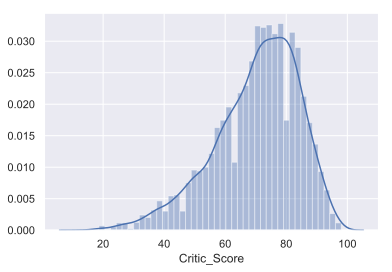

In [16]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df['Critic_Score']);

__jointplot()__

To look more closely at the relationship between two numerical variables, you can use _joint plot_, which is a cross betweena . scatter plot and a histogram. Let's see how the Critic_Score and User_Score features are related:

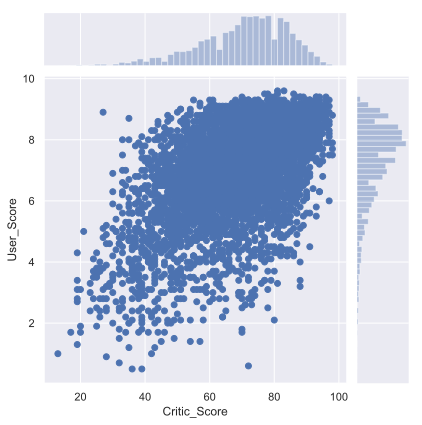

In [17]:
sns.jointplot(x='Critic_Score', y='User_Score',
              data=df, kind='scatter');

Another useful type of plot is a _box plot_. Lets compare critics ratings for the top 5 biggest gaming platforms.

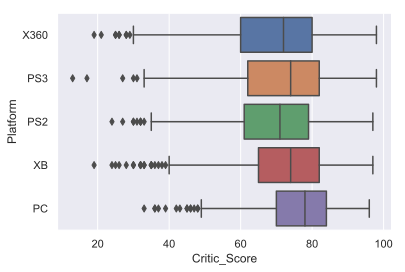

In [18]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y='Platform', x='Critic_Score',
            data=df[df['Platform'].isin(top_platforms)], orient="h");

The box by itself illustrates the interquartile spread of the distribution; it's length determined by the 25%(Q1) and 75%(Q3) percentiles. The vertical line inside the box marks the median (50%) of the distribution.

__heatmap()__

A _heat map_ allows you to view the distribution of a numerical variable over two cateogircal ones. Let's visualize the total sales of games by genre of gaming platform:

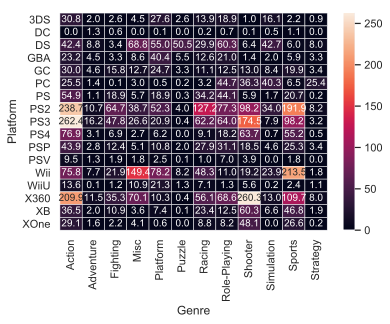

In [19]:
platform_genre_sales = df.pivot_table(index='Platform',
                                      columns='Genre',
                                      values='Global_Sales',
                                      aggfunc=sum).fillna(0).applymap(float)

sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

### 4. Plotly

Lets take a look at the ```plotly``` library. Plotly is an open-source library creation of interactive plots within a Jupyter notebook without having to use Javascript.

Interactive plots provide a user interface for detailed data exploration. For example, you can see exact numerical values by mousing over points, hide uninteresting series from the visuazliation, zoom in onto a specific part of the plot, etc.

We need to import the necessary modeuls and initialize ```plotly``` by calling the ```init__notebook__mode()``` function.

In [21]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

__Line plot__

First of all, let's build a _line plot_ showing the number of games released and their sales by year.

In [23]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']

Figure is the main class and a work horse of visualization in plotly. It consists of the data (an array of lines called traces in this library) and the style (represented by the layout object). In the simplest case, you may call the iplot function to return only traces.

The show_link parameter toggles the visibility of the links leading to the online platform plot.ly in your charts. Most of the time, this functionality is not needed, so you may want to turn it off by passing show_link=False to prevent accidental clicks on those links.

In [25]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Global_Sales'],
    name='Global Sales'
)

# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Number_of_Games'],
    name='Number of games released'
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {'title': 'Statistics for video games'}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)